<a href="https://colab.research.google.com/github/jpalma-espinosa/datascience/blob/master/Laboratorio_Clasificador_Bayesiano_Vino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificador Bayesiano aplicado al Vino

- Profesor: Dr. Ing. Rodrigo Salas
- Curso: Minería de Datos

Predicción de la calidad del Vino en base a las propiedades físico-químicas
   

- Fuente: El conjunto de datos fue creado por P. Cortez, A. Cerdeira, F. Almeida, T. Matos y J. Reis.
- Información: Los dos conjuntos de datos están relacionados con las variantes de vino blanco y tinto del vino portugués "Vinho Verde". Se dispone de la información físico-química (entradas) y de la información sensorial (salida)
- De la tabla de datos, cada fila corresponde a un registro del tipo de vino y cada columna a algún atributo físico químico. 1599 datos son vino tinto y 4898 datos son vino blanco.
- El objetivo es clasificar la calidad del vino según sus propiedades físico-químicas.
    

Repositorio de datos 
http://archive.ics.uci.edu/ml/index.php

Conjunto de datos de la Calidad del Vino
https://archive.ics.uci.edu/ml/datasets/wine+quality

1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Variable de salida:

12. quality (score between 0 and 10)

In [ ]:
# Conjuntos de datos almacenados en Toolbox
from sklearn import datasets  
# Separación del conjunto de datos en conjunto de entrenamiento y test
from sklearn.model_selection import train_test_split 
# Método para reescalar los datos
from sklearn.preprocessing import StandardScaler
# Paquete numérico para el procesamiento de datos
import numpy as np
# Paquete para realizar los gráficos 
import matplotlib.pyplot as plt
# Paquete para el manejo de datos
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline


In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
y = (df['quality']>5).astype('uint8')
X = df.values[:,:-1]

In [ ]:
sum(y)

855

In [ ]:
855/1599

0.5347091932457786

In [ ]:
df['Class']=y
df = df.drop(columns='quality')

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


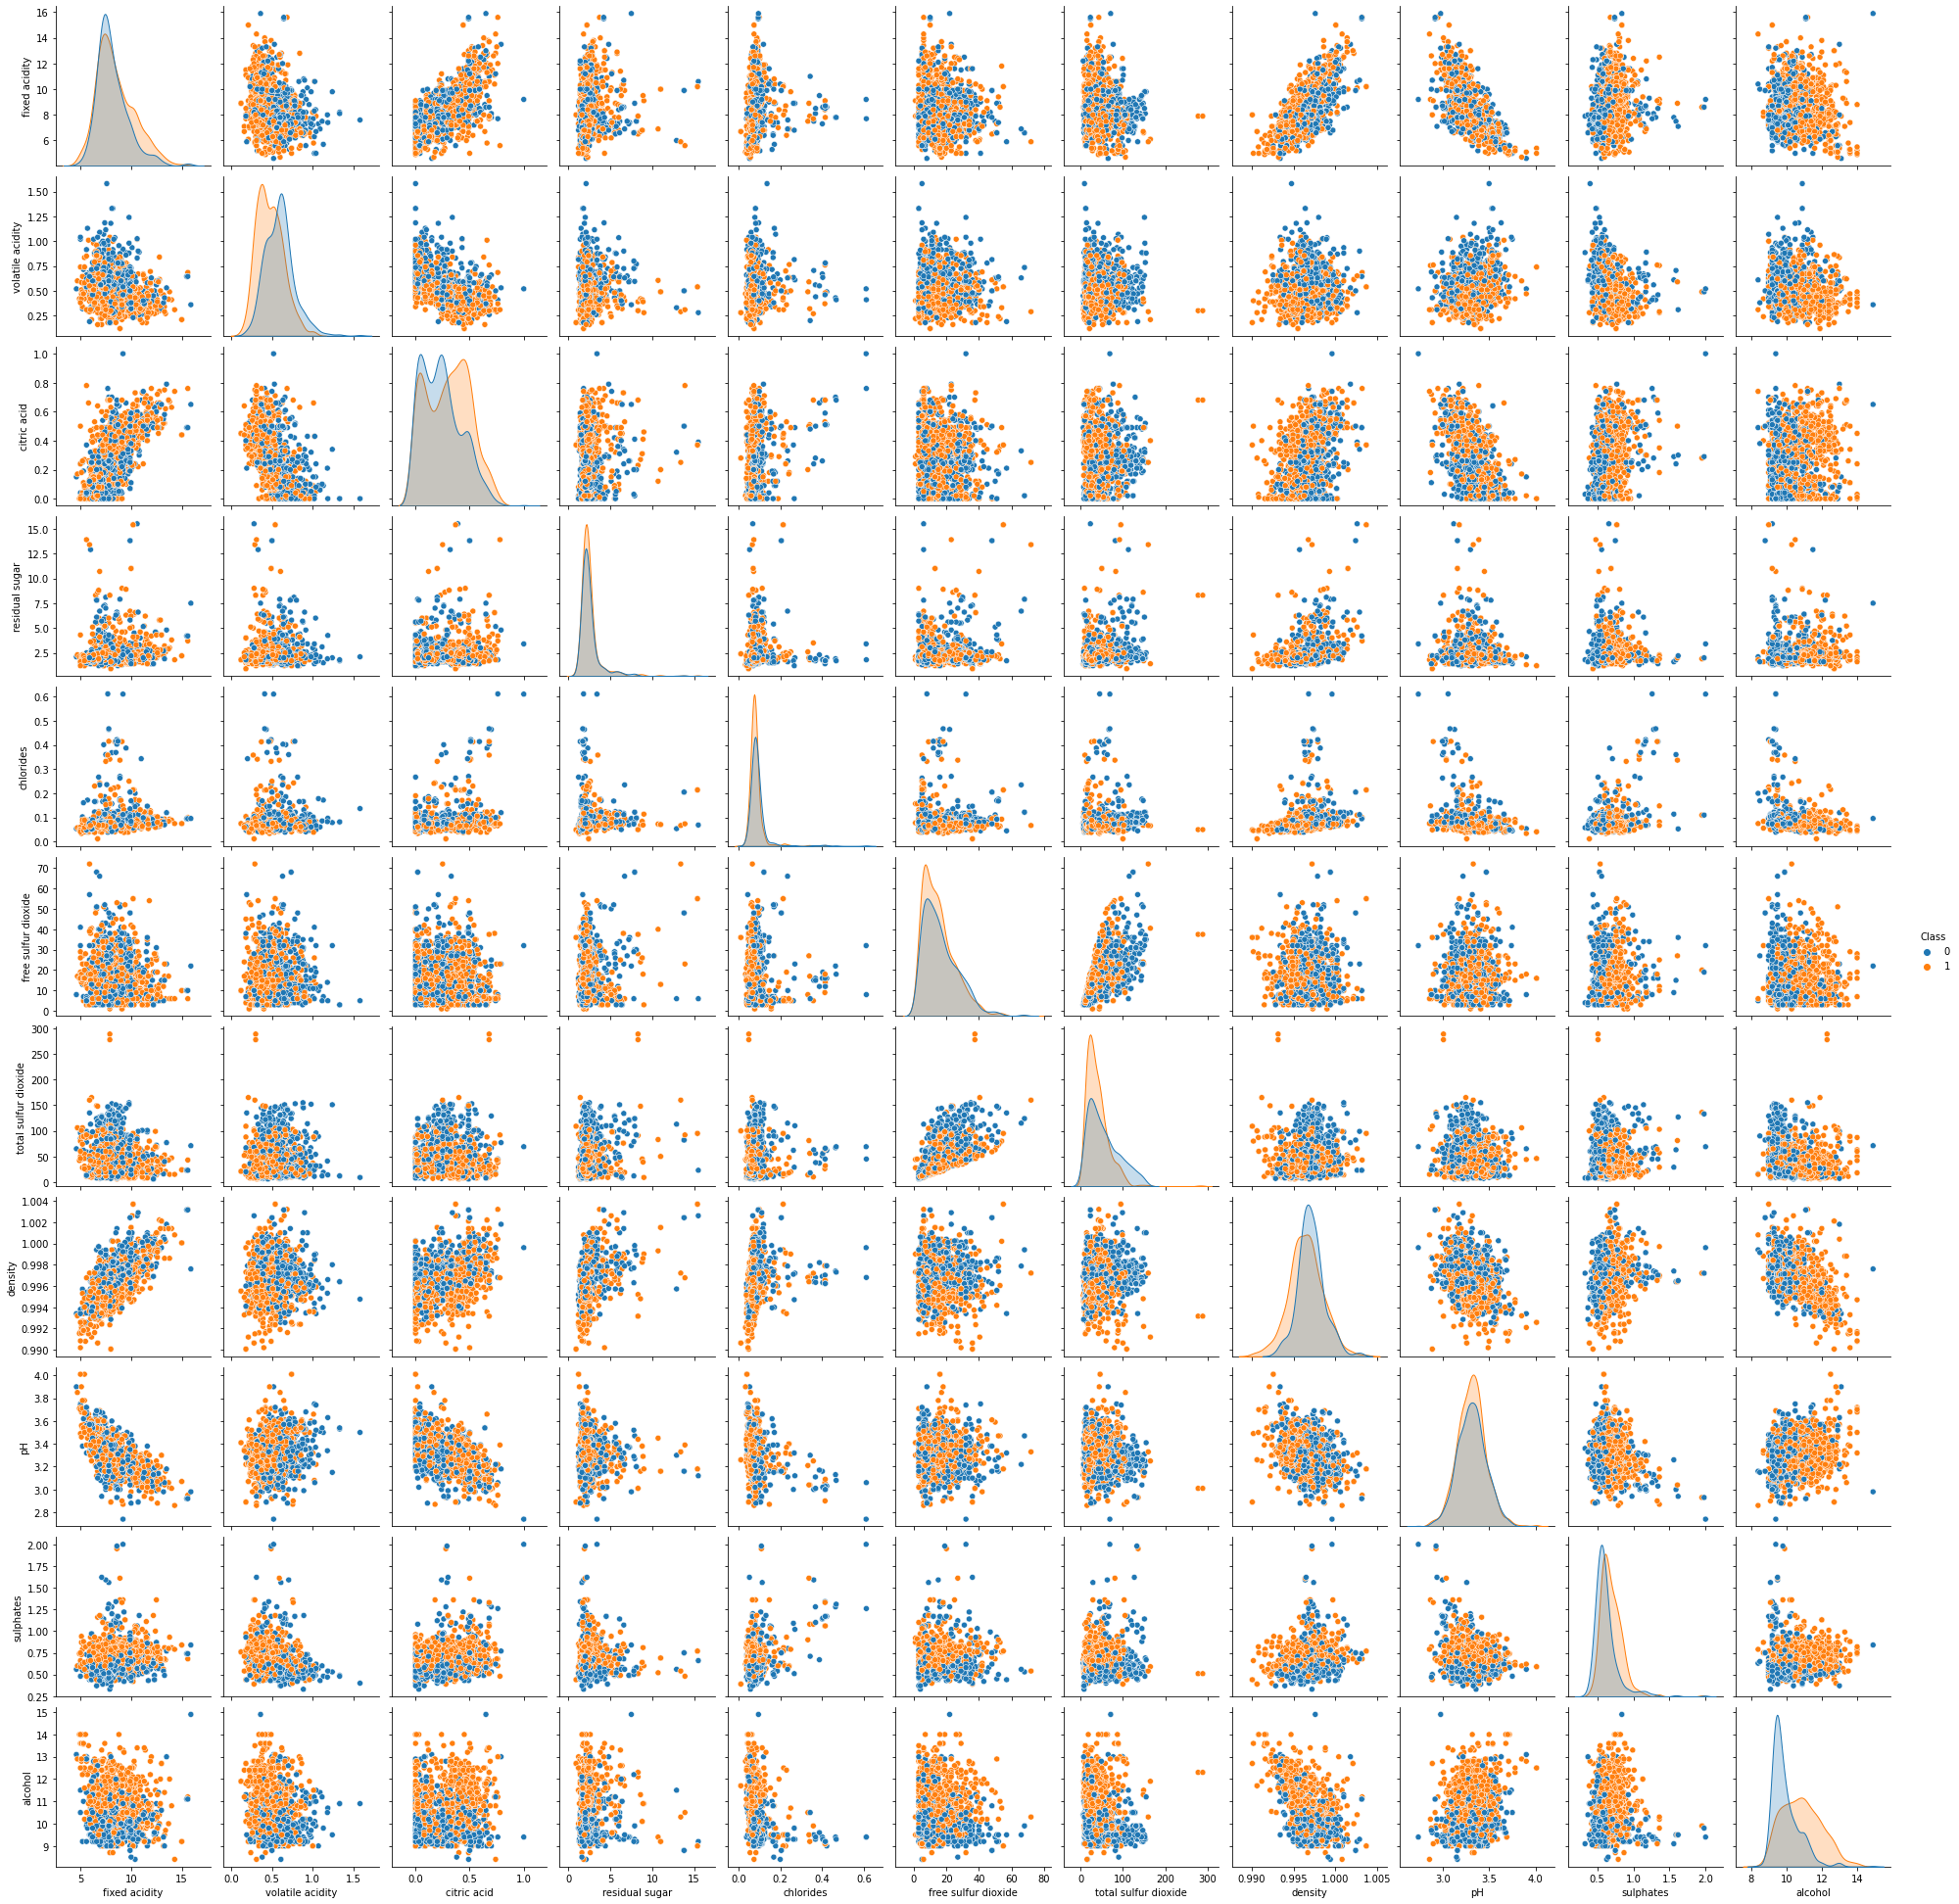

In [ ]:
sns.pairplot(df, hue='Class')

**Separación de los datos en conjunto de entrenamientos y test**

Con el fin de evaluar el desempeño del clasificador con datos que no se le han presentado previamente, el conjunto de datos se separa en entrenamiento y test.

In [ ]:
X_entrenamiento, X_test, y_entrenamiento, y_test = train_test_split(X, y, test_size = 0.4, random_state=0)

**Reescalamiento de las características**

Con el fin de que todos los atributos tenga igual importancia al entrenar un clasificador, y debido a que los clasificadores están optimizados para los datos escalados. Procederemos a reescalar los datos.

En particular, el escalamiento que se aplicará es centrar los datos en 0 y cambiar su variabilidad a 1:

$$Z=\frac{X - \overline{X}}{S_{X}}$$

donde $\overline{X}$ corresponde al promedio de los datos y $S_{X}$ a la desviación estándar de los datos de entrada.

In [ ]:
sc = StandardScaler()
# Los datos son reescalado con respecto a los datos de entrenamiento
sc.fit(X_entrenamiento) 
# Tanto el conjunto de entrenamiento como el de test son reescalados
Z_entrenamiento = sc.transform(X_entrenamiento)
Z_test = sc.transform(X_test)

**Clasificador LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis(solver="svd")
y_train = lda.fit(Z_entrenamiento, y_entrenamiento).predict(Z_entrenamiento)
confusion_matrix(y_train, y_entrenamiento)

array([[325, 127],
       [113, 394]])

In [ ]:
y_pred = lda.predict(Z_test)
confusion_matrix(y_test, y_pred)

array([[216,  90],
       [ 72, 262]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [ ]:
accuracy_score(y_pred, y_test)

0.746875

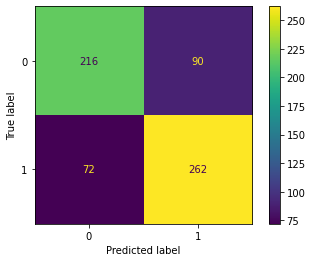

In [ ]:
plot_confusion_matrix(lda, Z_test, y_test,values_format='d') 

**Clasificador QDA**

In [ ]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_train = qda.fit(Z_entrenamiento, y_entrenamiento).predict(Z_entrenamiento)
confusion_matrix(y_entrenamiento,y_train)

array([[296, 142],
       [ 94, 427]])

In [ ]:
y_pred = qda.predict(Z_test)
confusion_matrix(y_test, y_pred)

array([[190, 116],
       [ 59, 275]])

In [ ]:
accuracy_score(y_pred, y_test)

0.7265625

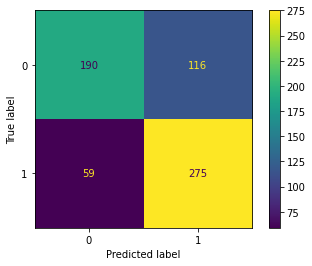

In [ ]:
plot_confusion_matrix(qda, Z_test, y_test, values_format='d') 

In [ ]:
11*11

In [ ]:
55+11

In [ ]:
len(y_train)

In [ ]:
959/66